<a href="https://colab.research.google.com/github/Cyprian-The-Analyst/Heart-disease-predictor/blob/main/heartdisease%20predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#importing datasets

In [11]:
import kagglehub
import pandas as pd
#loading the datasets
# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

# Load the dataset into a pandas DataFrame called 'df'
df = pd.read_csv(path + '/heart.csv')  # Assuming the CSV file is named 'heart.csv'

# Now you can display the first few rows using df.head()
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
#Data Analysis
df.shape

(918, 12)

In [14]:
#checking if there are null values
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [16]:
# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# Now calculate the correlation
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                        Age  RestingBP  Cholesterol  FastingBS     MaxHR  \
Age                1.000000   0.254399    -0.095282   0.198039 -0.382045   
RestingBP          0.254399   1.000000     0.100893   0.070193 -0.112135   
Cholesterol       -0.095282   0.100893     1.000000  -0.260974  0.235792   
FastingBS          0.198039   0.070193    -0.260974   1.000000 -0.131438   
MaxHR             -0.382045  -0.112135     0.235792  -0.131438  1.000000   
Oldpeak            0.258612   0.164803     0.050148   0.052698 -0.160691   
HeartDisease       0.282039   0.107589    -0.232741   0.267291 -0.400421   
Sex_M              0.055750   0.005133    -0.200092   0.120076 -0.189186   
ChestPainType_ATA -0.218165  -0.046153     0.150954  -0.140514  0.253735   
ChestPainType_NAP -0.011335  -0.041348    -0.006634  -0.039249  0.134580   
ChestPainType_TA   0.032042   0.049855     0.017365   0.026885  0.100025   
RestingECG_Normal -0.230566  -0.116851    -0.038470  -0.093028  0.023801   
RestingECG_S

<Axes: >

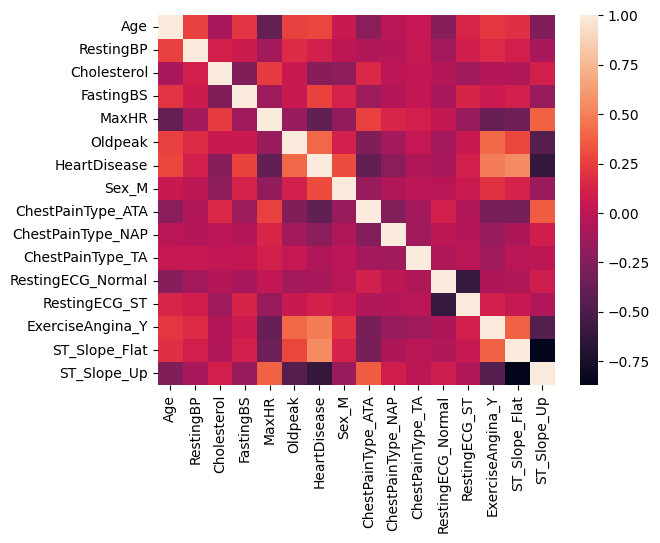

In [17]:
sns.heatmap(df.corr())